In [2]:
import matplotlib.pyplot as plt
import straph as sg

In [3]:
plt.rcParams["figure.figsize"] = (12,9)

# Temporal Paths in Stream Graph

In this tutorial we will use the example below, feel free to change it (cf: Notebook on random stream graphs).

In [4]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  8
Nb of segmented links :  11.0
Nb of event times :  11


<AxesSubplot:xlabel='t', ylabel='Nodes'>

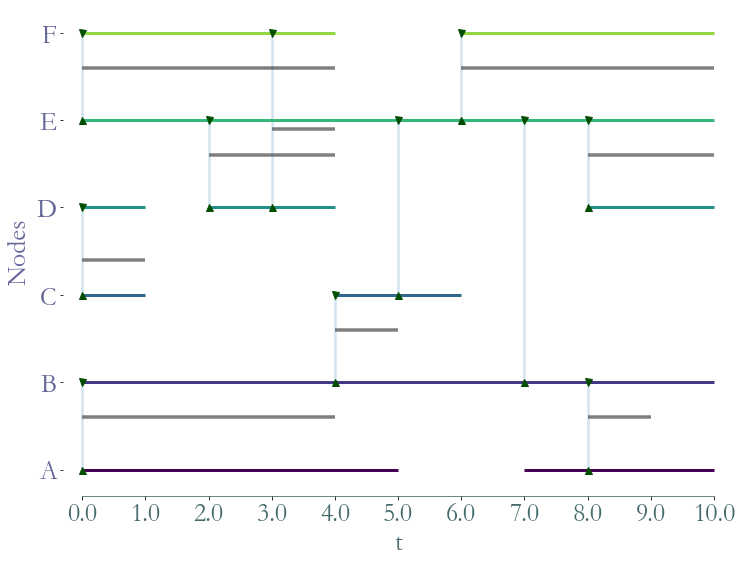

In [5]:
S.plot()

In the following we use Straph's API to compute different types of temporal paths.

 We can consider two types of source and destination : a temporal node $(t_0,t_1,v) \in \overline{W}$ or a node $u \in V$.
Resulting in 4 types of temporal paths:

    - temporal source -> destination
    - temporal source -> temporal destination
    - source -> temporal destination
    - source -> destination

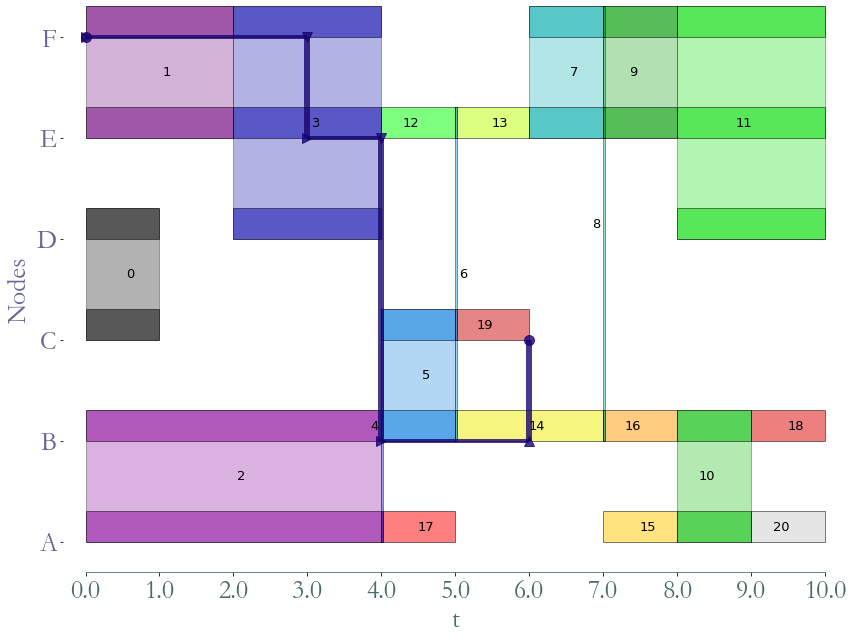

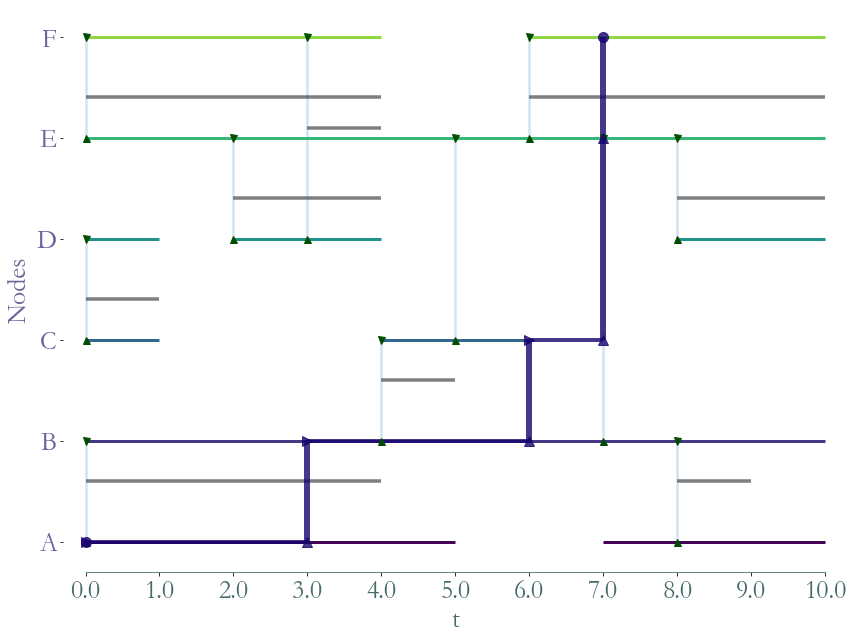

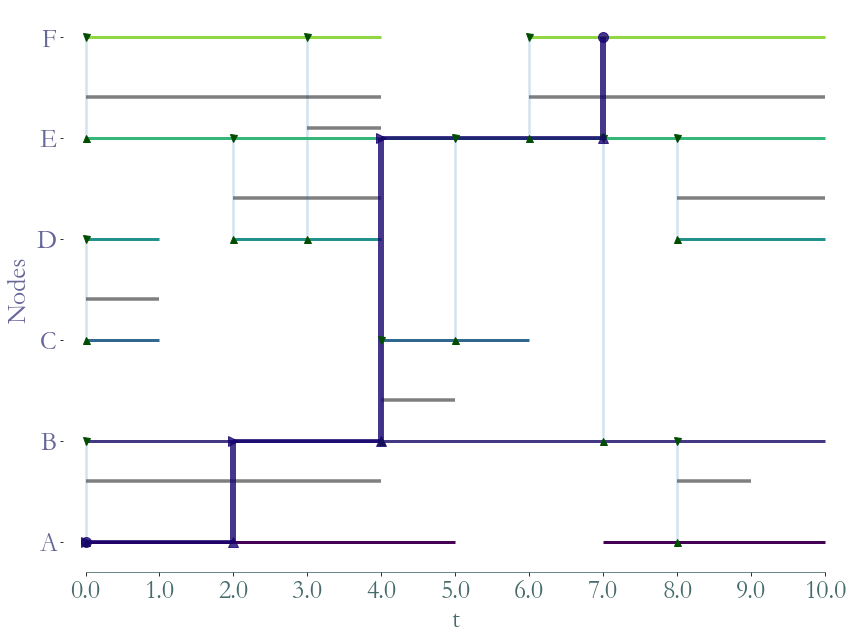

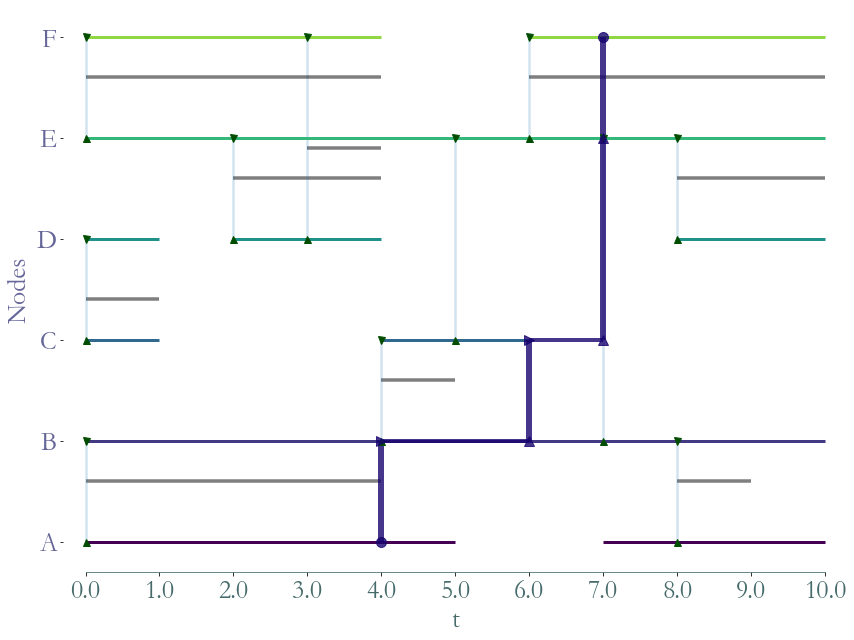

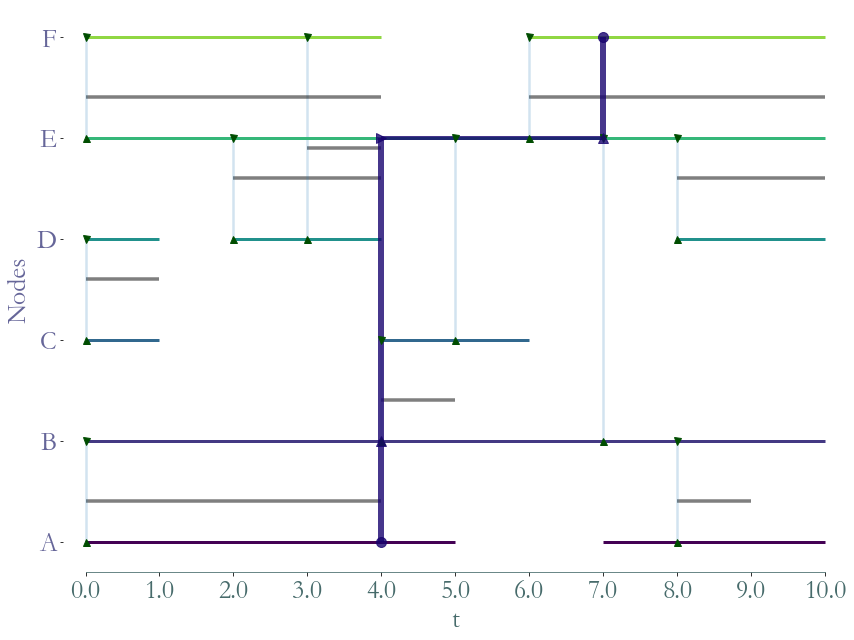

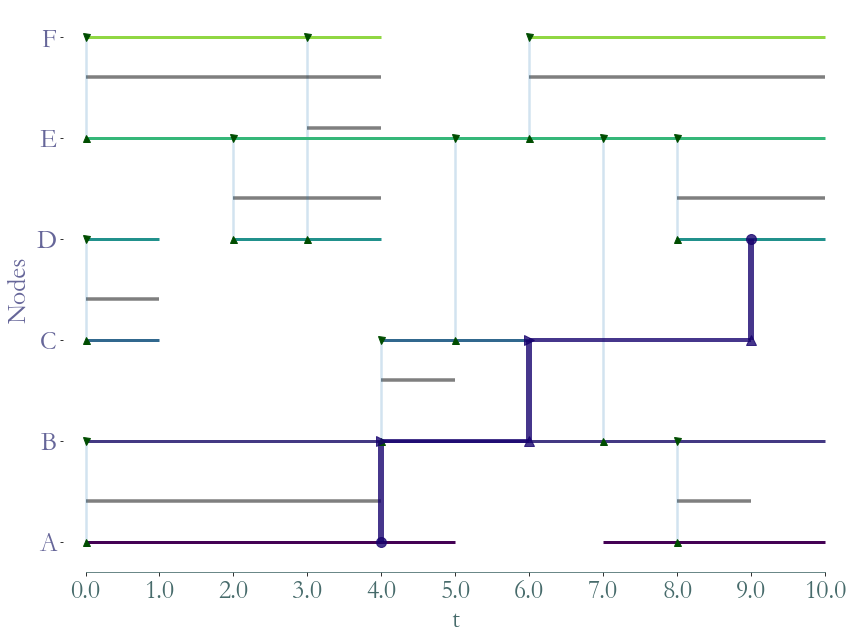

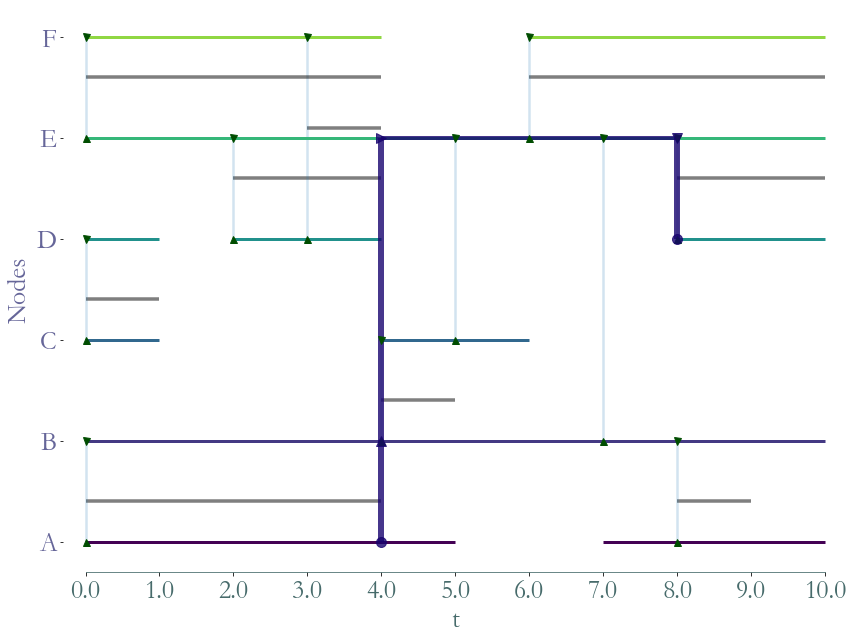

{5: 0, 4: 0.0, 3: 2.0, 2: 5.0, 1: 5.0, 0: 8.0}

In [6]:
P = sg.Path(times=[0, 3, 4, 6],
         links=[(5, 5), (5, 4), (4, 1), (1, 2)], )
P.plot(S, dag=True)

# FoP (0,A)-F
P = sg.Path(times=[0, 3, 6, 7, 7],
         links=[(0, 0), (0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFoP (0,A)-F
P = sg.Path(times=[0, 2, 4, 7],
         links=[(0, 0), (0, 1), (1, 4), (4, 5)], )
P.plot(S)

# FP A-F
P = sg.Path(times=[4, 6, 7, 7],
         links=[(0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFP A-F
P = sg.Path(times=[4, 4, 7],
         links=[(0, 1), (1, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SP A-D
P = sg.Path(times=[4, 6, 9],
         links=[(0, 1), (1, 2), (2, 3)])
P.plot(S)
# plt.show()

#  FSP A-D
P = sg.Path(times=[4, 4, 8],
         links=[(0, 1), (1, 4), (4, 3)], )
P.plot(S)
plt.show()

S.times_to_reach((0, 5, 0))


## Optimal temporal paths

We consider the following types of temporal paths and their corresponding features:

    - Foremost Path - Time To Reach
    - Fastest Path - Latency
    - Shortest Path - Distance
    - Foremost Shortest Path - Distance, Duration
    - Fastest Shortest Path - Distance, Duration
    - Shortest Fastest Path - Latency, Length

In [7]:
label_to_node = {v:k for k,v in S.node_to_label.items()}

### 1. L-Algorithm

In [7]:
#TODO : Quick description then ref to paper !

### 1.1 Foremost Path

Let's start with a temporal source and a temporal destination.

In [10]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 

Let's compute the time to reach (8,10,D) from (0,5,A). By default the starting time is $b$ if the source is $(b,e,u)$.

In [11]:
ttr = S.times_to_reach(source,destination)
ttr

{(8, 10, 3): inf}

We can specify a starting time, which belong to the temporal source (obviously), let's say 4.

In [12]:
source = (0,5,label_to_node['A']) 
destination = (8,10,label_to_node['D']) 
start_time = 4
ttr = S.times_to_reach(source,destination,start_time)
ttr

{(8, 10, 3): inf}

Now, with a source node and a temporal destination:

In [13]:
source = label_to_node['A']
destination = (8,10,label_to_node['D'])
ttr = S.times_to_reach(source,destination)
ttr

{(8, 10, 3): inf}

Let's add a starting time:

In [14]:
source = label_to_node['A']
destination = (8,10,label_to_node['D'])
start_time = 8
ttr = S.times_to_reach(source,destination,start_time)
ttr

{(8, 10, 3): inf}

Finally with a source node and a destination node:

In [15]:
source = label_to_node['A']
destination = label_to_node['D']
ttr = S.times_to_reach(source,destination)
ttr

{3: 8.0}

Let's add a starting time:

In [16]:
source = label_to_node['A']
destination = label_to_node['D']
start_time = 3
ttr = S.times_to_reach(source,destination,start_time)
ttr

{3: 5.0}

The input for a single source can be a source node or a temporal source node.

In [17]:
source = (0,5,label_to_node['A'])
ttr = S.times_to_reach(source)
ttr

{5: 0, 4: 0.0, 3: 2.0, 2: 5.0, 1: 5.0, 0: 8.0}

In [18]:
source = (0,5,label_to_node['A'])
start_time = 3
ttr = S.times_to_reach(source,start_time=start_time)
ttr

{5: 0, 4: 0, 3: 0, 2: 2.0, 1: 2.0, 0: 5.0}

In [19]:
source = label_to_node['A']
ttr = S.times_to_reach(source)
ttr

{0: 0.0, 1: 0.0, 2: 4.0, 4: 5.0, 5: 6.0, 3: 8.0}

In [20]:
source = label_to_node['A']
start_time = 7
ttr = S.times_to_reach(source,start_time=start_time)
ttr

{0: 0}

### 1.2 Other kind of optimal paths 

The API is the same for all type of minimum temporal path (the start_time option is only available for foremost path and shortest foremost path).

### Shortest Foremost Path

In [21]:
source = (2,label_to_node['A']) 
destination = label_to_node['D']
ttr,length = S.times_to_reach_and_lengths(source,destination)
ttr,length

({3: 6.0}, {3: 3})

In [22]:
source = (2,label_to_node['A']) 
destination = label_to_node['D']
start_time = 4
ttr = S.times_to_reach_and_lengths(source,destination,start_time)
ttr

({3: 4.0}, {3: 3})

### Shortest Path

In [23]:
source = label_to_node['A']
destination = label_to_node['D']
distances = S.distances(source,destination)
distances

{3: 3}

### Fastest Path

In [24]:
source = label_to_node['A']
destination = label_to_node['D']
latencies = S.latencies(source,destination)
latencies

{3: 4.0}

### Fastest Shortest Path

In [25]:
source = label_to_node['A']
source = (0,5,label_to_node['A'])
distances,durations = S.distances_and_durations(source)
distances,durations

({5: 0, 4: 1, 3: 1, 2: 2, 1: 2, 0: 3},
 {5: 0, 4: 0, 3: 0, 2: 1.0, 1: 3.0, 0: 4.0})

In [26]:
source = label_to_node['A']
destination = label_to_node['D']
distances = S.distances_and_durations(source)
distances

({0: 0, 1: 1, 2: 2, 4: 2, 5: 3, 3: 3},
 {0: 0, 1: 0, 2: 0.0, 4: 3.0, 5: 3.0, 3: 4.0})

### Shortest Fastest Path

In [27]:
source = label_to_node['A']
latencies,lengths = S.latencies_and_lengths(source)
latencies,lengths

({0: 0, 1: 0, 2: 0.0, 4: 1.0, 5: 2.0, 3: 4.0},
 {0: 0, 1: 1, 2: 2, 4: 3, 5: 4, 3: 3})

In [28]:
source = (0,5,label_to_node['A']) 
destination = label_to_node['D']
latencies,lengths = S.latencies_and_lengths(source,destination)
latencies,lengths

({3: 0}, {3: 1})

In [29]:
source = label_to_node['A']
destination = label_to_node['D']
latencies,lengths = S.latencies_and_lengths(source,destination)
latencies,lengths

({3: 4.0}, {3: 3})

## Condensation Based Path Algorithms

We propose alternative methods to compute Foremost Paht and Fastest Path using the Condensation Graph of $S$.

In [38]:
source = label_to_node['A']
dag = S.condensation_dag()

# Foremost Path
ttr = dag.times_to_reach_ss(source)
print("Times to reach :",ttr)
# Fastest Path
lat = dag.latencies_ss(source)
print("Latencies :",lat)

Times to reach : {2: 4.0, 3: 8.0, 4: 5.0, 5: 6.0, 0: 0, 1: 0.0}
Latencies : {2: 0, 3: 4.0, 4: 1.0, 5: 2.0, 0: 0, 1: 0}
